In [50]:
import pandas as pd

application = pd.read_csv("/Users/naoki/diveintocode-ml/application_train.csv")

In [51]:
#数値データのみを抽出し、application2に格納

application2 = application
list_str=[]

for i in application.columns:
    if application[i].dtypes == 'O':
        application2 = application2.drop([i], axis = 1)
        list_str.append(i)

In [52]:
# 欠損値を０に置換する。
import numpy as np
application2 = application2.replace(np.nan,0)
# msno.bar(application2)

In [53]:
# カテゴリーデータをダミー変数化
application_str = application[list_str]
application_dummy = pd.get_dummies(application_str)
application_dummy.head(10)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#ダミー変数化したカテゴリーデータと、欠損値を０で置換した数値データを結合
application_mix = pd.concat([application2, application_dummy], axis=1)
application_mix.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0


 ## 【問題1】クロスバリデーション
事前学習期間では検証用データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。

事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

In [55]:
#　「TARGET」との相関係数の絶対値が、０.2を超えるデータは「EXT_SOURCE_2」と「EXT_SOURCE_3」の二つだけである。
list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.06 < abs(a) :
        print("{},{}".format(i,a)) 
        list_i.append(i)

TARGET,0.9999999999999735
DAYS_BIRTH,0.07823930830982699
REGION_RATING_CLIENT_W_CITY,0.06089266756482207
EXT_SOURCE_1,-0.06469813333590538
EXT_SOURCE_2,-0.1590296765101743
EXT_SOURCE_3,-0.11957192848712464


In [56]:
list_i = list_i[1:]
list_i

['DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [57]:
X = application_mix[list_i]
y = application_mix["TARGET"]

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [59]:
X.head()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,-9461,2,0.083037,0.262949,0.139376
1,-16765,1,0.311267,0.622246,0.000000
2,-19046,2,0.000000,0.555912,0.729567
3,-19005,2,0.000000,0.650442,0.000000
4,-19932,2,0.000000,0.322738,0.000000


In [60]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [61]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [63]:
reg = KNeighborsClassifier(n_neighbors=3)
cross_val_score(reg, X, y,  cv=kfold)

array([0.90296566, 0.90393808, 0.90198693, 0.90107639, 0.9015967 ,
       0.90335274, 0.90309258, 0.90540145, 0.90384053, 0.90432831])

In [64]:
reg

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [65]:
cross_val_score(reg, X, y,  cv=kfold).mean()

0.9031579364389424

In [66]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [67]:
reg = KNeighborsClassifier(n_neighbors=3)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

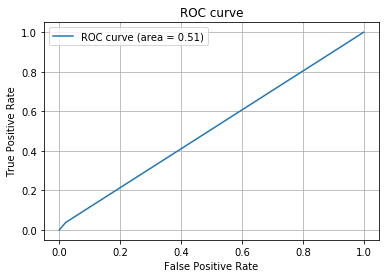

In [68]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, reg_pred)

# ついでにAUCも
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

 ## 【問題2】グリッドサーチ
これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。

scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation

GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

In [69]:
list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.05 < abs(a) :
        print("{},{}".format(i,a)) 
        list_i.append(i)

TARGET,0.9999999999999735
DAYS_BIRTH,0.07823930830982699
DAYS_ID_PUBLISH,0.05145717260705747
REGION_RATING_CLIENT,0.05889901494571257
REGION_RATING_CLIENT_W_CITY,0.06089266756482207
REG_CITY_NOT_WORK_CITY,0.05099446436812559
EXT_SOURCE_1,-0.06469813333590538
EXT_SOURCE_2,-0.1590296765101743
EXT_SOURCE_3,-0.11957192848712464
DAYS_LAST_PHONE_CHANGE,0.055217231616735266
CODE_GENDER_F,-0.05470405317880836
CODE_GENDER_M,0.05471268197127105
NAME_INCOME_TYPE_Working,0.05748118481836555
NAME_EDUCATION_TYPE_Higher education,-0.05659264414096324


In [70]:
list_i = list_i[1:]
list_i
X = application_mix[list_i]
y = application_mix["TARGET"]

In [71]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
reg = LogisticRegression()
print(reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [76]:
parameters = {'penalty': ['l1', 'l2'],
              'C': [100, 50, 10, 1, 0.5, 0.1, 0.01]}

# グリッドサーチする。

gs = GridSearchCV(estimator=reg, param_grid=parameters, cv=5,scoring="roc_auc")
gs.fit(X_std, y)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 50, 10, 1, 0.5, 0.1, 0.01],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [77]:
print(gs)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 50, 10, 1, 0.5, 0.1, 0.01],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)


In [78]:
gs.best_params_

{'C': 100, 'penalty': 'l2'}

In [79]:
gs.best_score_

0.7124487621900487

In [52]:
import lightgbm as lgb

/Users/naoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [53]:
reg =  lgb.LGBMRegressor()

In [54]:
reg

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
parameters = {'n_estimators': [10, 100 , 150],
              'max_depth': [3, 5, 7, 10]}

# グリッドサーチする。

gs = GridSearchCV(estimator=reg, param_grid=parameters, cv=5,scoring="roc_auc")
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [10, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [56]:
gs.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [57]:
gs.best_score_

0.7393519023985035

In [80]:
application2 = application
list_str=[]

for i in application.columns:
    if application[i].dtypes == 'O':
        application2 = application2.drop([i], axis = 1)
        list_str.append(i)

In [81]:
application_mix2 = pd.concat([application2, application_dummy], axis=1)
application_mix2.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X = application_mix2[list_i]
y = application_mix2["TARGET"]

 ## 【問題3】Kernelからの調査
KaggleのKernelから様々なアイデアを見つけ出して、列挙してください。

 - 標準化
 - 外れ値の除外　or 外れ値の置換

## 【問題4】高い汎化性能のモデル作成
問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。

その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

In [86]:
application = pd.read_csv("/Users/naoki/diveintocode-ml/application_train.csv")

In [87]:
#数値データのみを抽出し、application2に格納

application2 = application
list_str=[]

for i in application2.columns:
    if application2[i].dtypes == 'O':
        application2 = application2.drop([i], axis = 1)
        list_str.append(i)

In [89]:
application2.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
for i in application2.columns:
    application2[i] = application2[i].replace(np.nan, application2[i].median())

In [91]:
application2.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 106, dtype: int64

In [92]:
application_mix = pd.concat([application2, application_dummy], axis=1)

In [93]:
# application.isnull().sum(axis=0)
application_mix["NA_count"] = pd.DataFrame(application.isnull().sum(axis=1))

In [94]:
application_mix.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NA_count
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,0,0,0,0,0,0,1,0,2
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,48
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,56
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,50


In [95]:
len(application_mix)

307511

In [96]:
application_mix.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'NA_count'],
      dtype='object', length=247)

In [97]:
list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.04 < abs(a) :
        print("{},{}".format(i,a)) 
        list_i.append(i)

TARGET,0.9999999999999735
DAYS_BIRTH,0.07823930830982699
DAYS_EMPLOYED,-0.044931662657738666
DAYS_REGISTRATION,0.04197486283141716
DAYS_ID_PUBLISH,0.05145717260705747
FLAG_EMP_PHONE,0.04598221971659194
REGION_RATING_CLIENT,0.05889901494571257
REGION_RATING_CLIENT_W_CITY,0.06089266756482207
REG_CITY_NOT_LIVE_CITY,0.04439537480570038
REG_CITY_NOT_WORK_CITY,0.05099446436812559
EXT_SOURCE_1,-0.09888661450126368
EXT_SOURCE_2,-0.16029475320996656
EXT_SOURCE_3,-0.15589168562406397
DAYS_LAST_PHONE_CHANGE,0.05521823012584429
FLAG_DOCUMENT_3,0.04434634685114518
CODE_GENDER_F,-0.05470405317880836
CODE_GENDER_M,0.05471268197127105
NAME_INCOME_TYPE_Pensioner,-0.046209422786620075
NAME_INCOME_TYPE_Working,0.05748118481836555
NAME_EDUCATION_TYPE_Higher education,-0.05659264414096324
NAME_EDUCATION_TYPE_Secondary / secondary special,0.04982373084813329
OCCUPATION_TYPE_Laborers,0.043018954955307075
ORGANIZATION_TYPE_XNA,-0.04598707841557863
HOUSETYPE_MODE_block of flats,-0.04059395087343372
EMERGENCYST

In [98]:
len(list_i)

26

In [99]:
application_mix3 = application_mix

In [100]:
X = application_mix3[list_i].drop("TARGET", axis=1)
y = application_mix3["TARGET"]

In [101]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [103]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
y_pred = clf.fit_predict(X_train)
# 正常を1、異常を-1と出力するようです
ANOMALY_DATA = -1
predicted_outlier_index = np.where(y_pred == ANOMALY_DATA)
print("外れ値の数:{}".format(len(predicted_outlier_index)))
X_train = X_train.iloc[predicted_outlier_index]
y_train = y_train.iloc[predicted_outlier_index]

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


外れ値の数:1


In [104]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [105]:
import lightgbm as lgb

In [106]:
y_train = np.array(y_train)
y_train
y_test = np.array(y_test)
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [108]:
clf = lgb.LGBMClassifier().fit(X_train, y_train)
y_pred =clf.predict(X_test)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.9195088321756549
適合率:0.3720316622691293
再現率:0.02314890822525037
F値 :0.04358578052550232
[[70549   238]
 [ 5950   141]]


In [109]:
clf.feature_importances_

array([336, 265, 330, 298,   1,  18,  22,  19,  24, 217, 380, 333, 363,
        42,  27,   9,   0,  43,  31,  22,  22,   0,   5,   6, 187],
      dtype=int32)

In [110]:
importance = clf.feature_importances_.reshape(len(clf.feature_importances_),1)
column = np.array(X.columns).reshape(len(clf.feature_importances_),1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,EXT_SOURCE_2,380
1,DAYS_LAST_PHONE_CHANGE,363
2,DAYS_BIRTH,336
3,EXT_SOURCE_3,333
4,DAYS_REGISTRATION,330


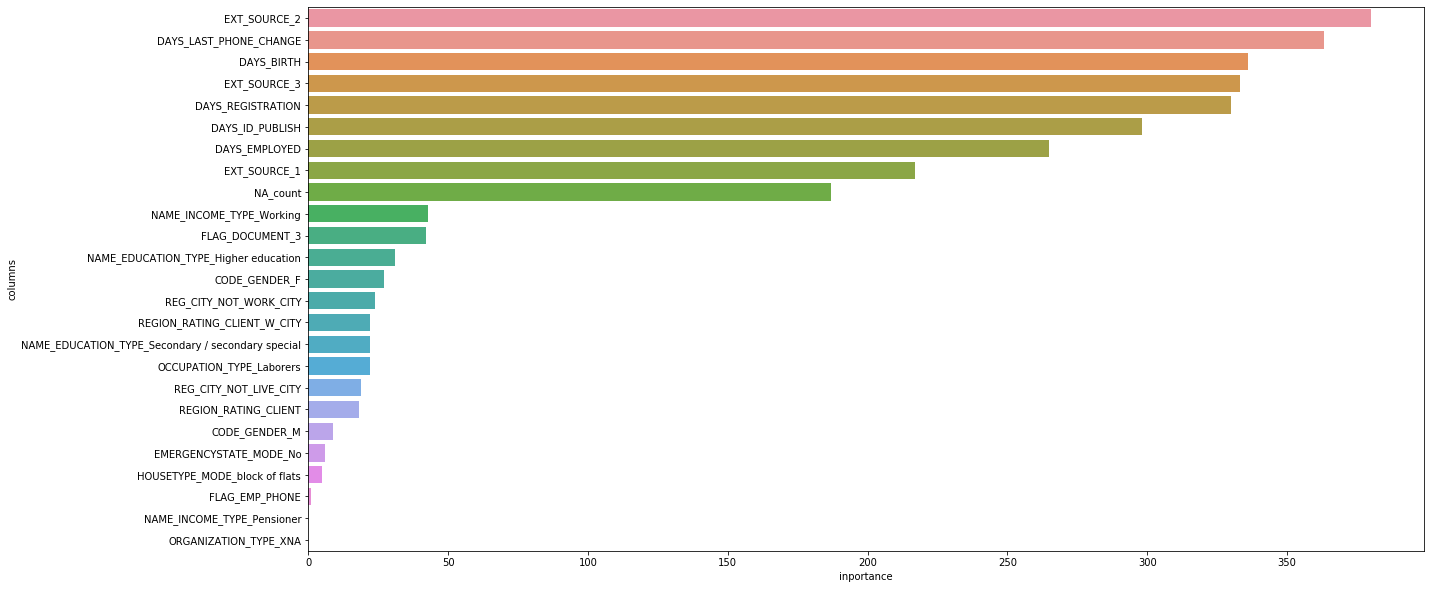

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.barplot(x="inportance", y="columns", data=feature_sorted)

In [112]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 30:
        list_col.append(a)

In [113]:
list_col

['EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH',
 'EXT_SOURCE_3',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_1',
 'NA_count',
 'NAME_INCOME_TYPE_Working',
 'FLAG_DOCUMENT_3',
 'NAME_EDUCATION_TYPE_Higher education']

In [114]:
X = X[list_col]

In [115]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [116]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [117]:
clf = lgb.LGBMClassifier(max_depth=5, n_estimators=100).fit(X_train, y_train)
y_pred =clf.predict(X_test)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.92061448008533
適合率:0.46153846153846156
再現率:0.01182071909374487
F値 :0.023051064510965263
[[70703    84]
 [ 6019    72]]


In [118]:
clf = lgb.LGBMClassifier(max_depth=3, n_estimators=1000).fit(X_train, y_train)
y_pred =clf.predict(X_test)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
正解率:0.9205884648403965
適合率:0.4669811320754717
再現率:0.016253488753899197
F値 :0.031413612565445025
[[70674   113]
 [ 5992    99]]


In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

In [120]:
reg = lgb.LGBMClassifier()

In [121]:
parameters = {'n_estimators': [10, 100 , 500, 1000],
              'max_depth': [3, 5, 7, 10]}

# グリッドサーチする。

gs = GridSearchCV(estimator=reg, param_grid=parameters, cv=5,scoring="roc_auc")
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_est

In [122]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 500}

In [123]:
gs.best_score_

0.7413680792651163

 ## 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

In [124]:
X = application_mix3[list_i].drop("TARGET", axis=1)
y = application_mix3["TARGET"]

In [125]:
X = X[list_col]

In [126]:
application_test = pd.read_csv("/Users/naoki/application_test.csv")

In [127]:
application_test = pd.get_dummies(application_test)

In [128]:
application_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
application_test.isnull().sum()

SK_ID_CURR                          0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
                                   ..
WALLSMATERIAL_MODE_Panel            0
WALLSMATERIAL_MODE_Stone, brick     0
WALLSMATERIAL_MODE_Wooden           0
EMERGENCYSTATE_MODE_No              0
EMERGENCYSTATE_MODE_Yes             0
Length: 242, dtype: int64

In [130]:
application_test["NA_count"] = pd.DataFrame(application_test.isnull().sum(axis=1))

In [131]:
application_test = application_test[list_col]

In [132]:
for i in application_test.columns:
    application_test[i] = application_test[i].replace(np.nan, 0)

In [133]:
application_test

,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,EXT_SOURCE_3,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,EXT_SOURCE_1,NA_count,NAME_INCOME_TYPE_Working,FLAG_DOCUMENT_3,NAME_EDUCATION_TYPE_Higher education
0,0.789654,-1740.0,-19241,0.159520,-5170.0,-812,-2329,0.752614,25,1,1,1
1,0.291656,0.0,-18064,0.432962,-9118.0,-1623,-4469,0.564990,44,1,1,0
2,0.699787,-856.0,-20038,0.610991,-2175.0,-3503,-4458,0.000000,44,1,0,1
3,0.509677,-1805.0,-13976,0.612704,-2000.0,-4208,-1866,0.525734,1,1,1,0
4,0.425687,-821.0,-13040,0.000000,-4000.0,-4262,-2191,0.202145,50,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.648575,-684.0,-19970,0.643026,-9094.0,-3399,-5169,0.000000,45,1,0,0
48740,0.684596,0.0,-11186,0.000000,-3015.0,-3003,-1149,0.000000,52,0,1,0
48741,0.632770,-838.0,-15922,0.283712,-2681.0,-1504,-3037,0.733503,18,0,1,0
48742,0.445701,-2308.0,-13968,0.595456,-1461.0,-1364,-2731,0.373090,19,0,1,1


In [134]:
clf = lgb.LGBMClassifier(max_depth=3, n_estimators=500).fit(X, y)
y_pred =clf.predict(application_test)
y_pred_proba =clf.predict_proba(application_test)

In [135]:
y_pred_proba.shape

(48744, 2)

In [136]:
y_pred_proba

array([[0.97998001, 0.02001999],
       [0.91200528, 0.08799472],
       [0.85411929, 0.14588071],
       ...,
       [0.94081081, 0.05918919],
       [0.95883117, 0.04116883],
       [0.5420852 , 0.4579148 ]])

In [137]:
sample_submission = pd.read_csv("/Users/naoki/sample_submission.csv")

In [144]:
sample_submission["TARGET"] = round(y_pred_proba[:,1])

In [145]:
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.020020
1,100005,0.087995
2,100013,0.145881
3,100028,0.052534
4,100038,0.339589
...,...,...
48739,456221,0.235008
48740,456222,0.352545
48741,456223,0.059189
48742,456224,0.041169


In [141]:
sample_submission.to_csv('/Users/naoki/submission.csv')

 - スコアは0.73263となった